## 순환 신경망

=순서가 상관있는 신경망

- 합성곱, 완전 연결 = 피드포워드 신경망

In [34]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = \
keras.datasets.imdb.load_data(num_words=300)

In [35]:
train_input.shape

(25000,)

In [36]:
print(train_input[0])  #글자가 숫자로 치환된 데이터

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 284, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [37]:
train_target[:20]  #부정0, 긍정1

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1],
      dtype=int64)

In [38]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = \
train_test_split(train_input, train_target, test_size=0.2)

In [39]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [40]:
train_seq = pad_sequences(train_input, maxlen=100)   #maxlen -> 최대 길이/ padding=pre, truncating=pre 기본값(post로 바꾸면 반대,,,)

In [41]:
train_seq.shape

(20000, 100)

In [42]:
train_seq[0]

array([231,  14, 243,   7,  22,   2,   2,  26,  55,   2,  23,   2,   2,
         8,  67,  98,   2,   4,   2,   5,   2,   4,   2,   5,   2,   9,
        55,   2, 180,  54,   4, 226, 182,   2,  56,   4,  52,   2, 140,
         2,   2,   5,   2,  61,   2,   2, 132,   2,   2,  15, 243,   7,
         2,   5,   4, 105,  26,  33,   2,   8, 135,  51, 266,  91,   2,
         8,  98, 146,  24,   2,  15,   4,  91,   2,   2,   8, 142,   2,
         2,   9,   8,   2,  21,  12, 166,  12,  53,   2,  48, 294, 165,
         2,  13, 104,  75,  70,   2,   2,  18,  15])

In [43]:
train_input[0][-10:]  #원본 데이터의 뒷 부분이 저장되어있다

[165, 2, 13, 104, 75, 70, 2, 2, 18, 15]

In [47]:
val_seq = pad_sequences(val_input, maxlen=100)

In [48]:
model = keras.Sequential()

In [49]:
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 300)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

### 원-핫 인코딩(One-Hot Encoding)

In [50]:
train_oh = keras.utils.to_categorical(train_seq)

In [51]:
train_oh.shape

(20000, 100, 300)

In [54]:
#train_oh[0][0][:]

In [53]:
val_oh = keras.utils.to_categorical(val_seq)

In [55]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Layer (type)         ┃ Output Shape   ┃  Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ simple_rnn_5         │ (None, 8)      │    2,472 │
│ (SimpleRNN)          │                │          │
├──────────────────────┼────────────────┼──────────┤
│ dense_1 (Dense)      │ (None, 1)      │        9 │
└──────────────────────┴────────────────┴──────────┘

 Total params: 2,481 (9.69 KB)

 Trainable params: 2,481 (9.69 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

cp_cb = keras.callbacks.ModelCheckpoint('best-rnn.keras', save_best_only=True)
es_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(
    train_oh, 
    train_target, 
    epochs=100, 
    batch_size=64, 
    validation_data=(val_oh, val_target),
    callbacks=[cp_cb, es_cb]
)

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.5064 - loss: 0.6998 - val_accuracy: 0.5216 - val_loss: 0.6954
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5185 - loss: 0.6956 - val_accuracy: 0.5262 - val_loss: 0.6907
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5388 - loss: 0.6887 - val_accuracy: 0.5768 - val_loss: 0.6781
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5804 - loss: 0.6755 - val_accuracy: 0.6020 - val_loss: 0.6650
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6145 - loss: 0.6609 - val_accuracy: 0.6276 - val_loss: 0.6522
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6359 - loss: 0.6477 - val_accuracy: 0.6544 - val_loss: 0.6329
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6628 - loss: 0.6253 - val_accuracy: 0.6718 - val_loss: 0.6127
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6855 - loss: 0.6048 - val_acc

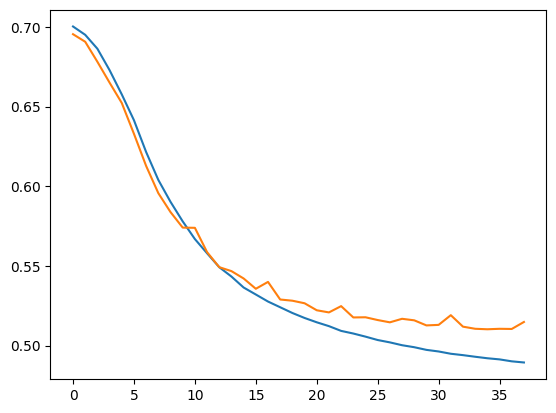

In [62]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

### 단어 임베딩

= 고차원의 좌표에 단어 위치 시키기...

In [78]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(300, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [79]:
model2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Layer (type)         ┃ Output Shape   ┃  Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ embedding_3          │ ?              │        0 │
│ (Embedding)          │                │ (unbuil… │
├──────────────────────┼────────────────┼──────────┤
│ simple_rnn_9         │ ?              │        0 │
│ (SimpleRNN)          │                │ (unbuil… │
├──────────────────────┼────────────────┼──────────┤
│ dense_5 (Dense)      │ ?              │        0 │
│                      │                │ (unbuil… │
└──────────────────────┴────────────────┴──────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [80]:
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

cp_cb = keras.callbacks.ModelCheckpoint('best-rnn_emb.keras', save_best_only=True)
es_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model2.fit(
    train_seq, 
    train_target, 
    epochs=100, 
    batch_size=64, 
    validation_data=(val_seq, val_target),
    callbacks=[cp_cb, es_cb]
)

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.4932 - loss: 0.6993 - val_accuracy: 0.5116 - val_loss: 0.6935
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5199 - loss: 0.6931 - val_accuracy: 0.5210 - val_loss: 0.6912
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5302 - loss: 0.6895 - val_accuracy: 0.5302 - val_loss: 0.6894
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5591 - loss: 0.6847 - val_accuracy: 0.5402 - val_loss: 0.6880
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5641 - loss: 0.6831 - val_accuracy: 0.5420 - val_loss: 0.6867
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5742 - loss: 0.6801 - val_accuracy: 0.5444 - val_loss: 0.6858
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5748 - loss: 0.6782 - val_accuracy: 0.5398 - val_loss: 0.6850
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5887 - loss: 0.6734 - val_accu

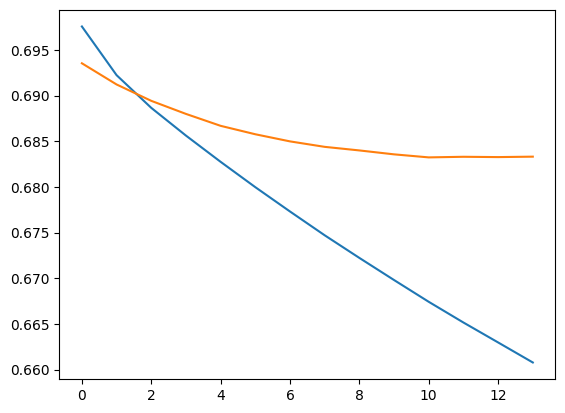

In [81]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()